# SARS Prediction with B-cell data

## Get Data

https://www.kaggle.com/futurecorporation/epitope-prediction

In [1]:
import pandas as pd

bcell = pd.read_csv("https://raw.githubusercontent.com/likarajo/covid19_prediction/main/input_bcell.csv")
bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [50]:
sars = pd.read_csv("https://raw.githubusercontent.com/likarajo/covid19_prediction/main/input_sars.csv")
sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


## Inspect the data
* Type of Features
* Null values
* Statistics

In [2]:
bcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14387 non-null  object 
 1   protein_seq          14387 non-null  object 
 2   start_position       14387 non-null  int64  
 3   end_position         14387 non-null  int64  
 4   peptide_seq          14387 non-null  object 
 5   chou_fasman          14387 non-null  float64
 6   emini                14387 non-null  float64
 7   kolaskar_tongaonkar  14387 non-null  float64
 8   parker               14387 non-null  float64
 9   isoelectric_point    14387 non-null  float64
 10  aromaticity          14387 non-null  float64
 11  hydrophobicity       14387 non-null  float64
 12  stability            14387 non-null  float64
 13  target               14387 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


In [51]:
sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    520 non-null    object 
 1   protein_seq          520 non-null    object 
 2   start_position       520 non-null    int64  
 3   end_position         520 non-null    int64  
 4   peptide_seq          520 non-null    object 
 5   chou_fasman          520 non-null    float64
 6   emini                520 non-null    float64
 7   kolaskar_tongaonkar  520 non-null    float64
 8   parker               520 non-null    float64
 9   isoelectric_point    520 non-null    float64
 10  aromaticity          520 non-null    float64
 11  hydrophobicity       520 non-null    float64
 12  stability            520 non-null    float64
 13  target               520 non-null    int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 57.0+ KB


In [3]:
categorical_features = bcell.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)
continuous_features = bcell.select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_features.remove('target')
print(continuous_features)                                  

['parent_protein_id', 'protein_seq', 'peptide_seq']
['start_position', 'end_position', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']


* 3 categorical features
* 10 continuous features
* No null values

### Explore categorical features

In [4]:
bcell[categorical_features].describe()

,parent_protein_id,protein_seq,peptide_seq
count,14387,14387,14387
unique,760,757,14362
top,P10155,MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTY...,ARDVLAVVSK
freq,560,560,3


`parent_protein_id` and `protein_seq` have almost identical statistics. So one can be ignored.

### Explore continuous features

In [5]:
bcell[continuous_features].describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
count,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
mean,297.675818,308.085077,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902
std,353.741450,353.733297,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936
25%,84.000000,95.000000,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529
50%,191.000000,200.000000,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268
75%,382.000000,393.000000,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172
max,3079.000000,3086.000000,1.546000,27.189000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667


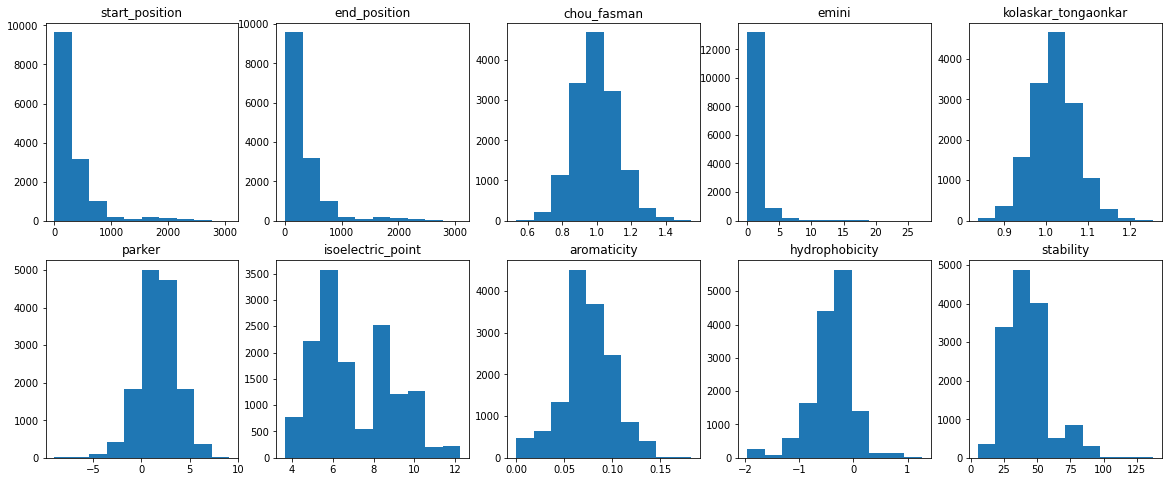

In [6]:
import matplotlib.pyplot as plt
import math

n = len(continuous_features)
h = math.floor(n/2)
v = math.ceil(n/h)
i = 1
plt.rcParams["figure.figsize"] = (20,8)
for feature_name in continuous_features:
  plt.subplot(v,h,i)
  plt.hist(bcell[feature_name])
  plt.title(feature_name)
  i += 1
plt.show()

Range is abnormal for some features: `start_position`, `end_position`, `emini`.

## Data Preprocessing

For both training (bcell) and testing (sars) datasets:

* Find length of protein sequence
* Find length of peptide
* Find peptide region
* Drop unnecessary columns

In [7]:
bcell['protein_seq_length'] = bcell.apply(lambda x: len(x.protein_seq), axis=1)
bcell['peptide_length'] = bcell.apply(lambda x: len(x.peptide_seq), axis=1)
bcell['peptide_region'] = bcell.apply(lambda x: x.peptide_length/x.protein_seq_length, axis=1)

bcell = bcell.drop(columns=['parent_protein_id','protein_seq','peptide_seq','start_position','end_position'])

In [8]:
bcell.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,protein_seq_length,peptide_length,peptide_region
0,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,397,5,0.012594
1,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,336,5,0.014881
2,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,207,5,0.024155
3,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,1005,5,0.004975
4,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,260,5,0.019231


In [9]:
bcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chou_fasman          14387 non-null  float64
 1   emini                14387 non-null  float64
 2   kolaskar_tongaonkar  14387 non-null  float64
 3   parker               14387 non-null  float64
 4   isoelectric_point    14387 non-null  float64
 5   aromaticity          14387 non-null  float64
 6   hydrophobicity       14387 non-null  float64
 7   stability            14387 non-null  float64
 8   target               14387 non-null  int64  
 9   protein_seq_length   14387 non-null  int64  
 10  peptide_length       14387 non-null  int64  
 11  peptide_region       14387 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.3 MB


In [52]:
sars['protein_seq_length'] = sars.apply(lambda x: len(x.protein_seq), axis=1)
sars['peptide_length'] = sars.apply(lambda x: len(x.peptide_seq), axis=1)
sars['peptide_region'] = sars.apply(lambda x: x.peptide_length/x.protein_seq_length, axis=1)

sars = sars.drop(columns=['parent_protein_id','protein_seq','peptide_seq','start_position','end_position'])

In [54]:
sars.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,protein_seq_length,peptide_length,peptide_region
0,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0,1255,17,0.013546
1,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0,1255,15,0.011952
2,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0,1255,9,0.007171
3,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0,1255,15,0.011952
4,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0,1255,17,0.013546


In [53]:
sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chou_fasman          520 non-null    float64
 1   emini                520 non-null    float64
 2   kolaskar_tongaonkar  520 non-null    float64
 3   parker               520 non-null    float64
 4   isoelectric_point    520 non-null    float64
 5   aromaticity          520 non-null    float64
 6   hydrophobicity       520 non-null    float64
 7   stability            520 non-null    float64
 8   target               520 non-null    int64  
 9   protein_seq_length   520 non-null    int64  
 10  peptide_length       520 non-null    int64  
 11  peptide_region       520 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 48.9 KB


Only *continuous* features remain

## Find important features
 Use [Extra-trees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) for finding feature importance

### Create and train model

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
features = bcell.drop(columns=['target'])
label = bcell['target']

In [12]:
model = ExtraTreesClassifier()

In [13]:
model.fit(X=features, y=label)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### Extract and normalize feature importance

In [14]:
feature_list = features.columns.to_list()
feature_importances = model.feature_importances_

for i in range(len(feature_list)):
  print(feature_list[i], feature_importances[i])

chou_fasman 0.10592701780637316
emini 0.10177020271693828
kolaskar_tongaonkar 0.10040657568278219
parker 0.10872363845096075
isoelectric_point 0.0875939078053279
aromaticity 0.08229784111226313
hydrophobicity 0.07755138700391538
stability 0.07851434587282899
protein_seq_length 0.07839485136450934
peptide_length 0.09569834380542677
peptide_region 0.08312188837867401


In [15]:
import numpy as np

feature_importances_normalized = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

for i in range(len(feature_list)):
  print(feature_list[i], feature_importances_normalized[i])

chou_fasman 0.004739212892789355
emini 0.003898265800505184
kolaskar_tongaonkar 0.004417591062921891
parker 0.004774123819385936
isoelectric_point 0.012848764852705426
aromaticity 0.017152823191478254
hydrophobicity 0.017172590239230266
stability 0.014485986472523275
protein_seq_length 0.016152380103994633
peptide_length 0.014968795051561408
peptide_region 0.016537290307715627


### Visualize the normalized feature importance

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

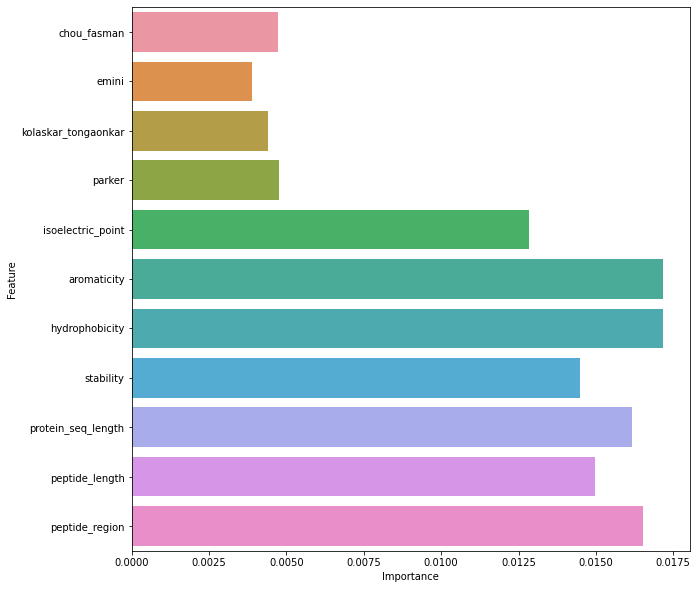

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importances_normalized, y=feature_list)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Some features are more important than others.

But for this case, we will consider all features as important based on the subject matter.

## Explore Data Distribution of the features

In [18]:
labels = bcell['target']
feature_columns = bcell.columns.to_list()
feature_columns.remove('target')

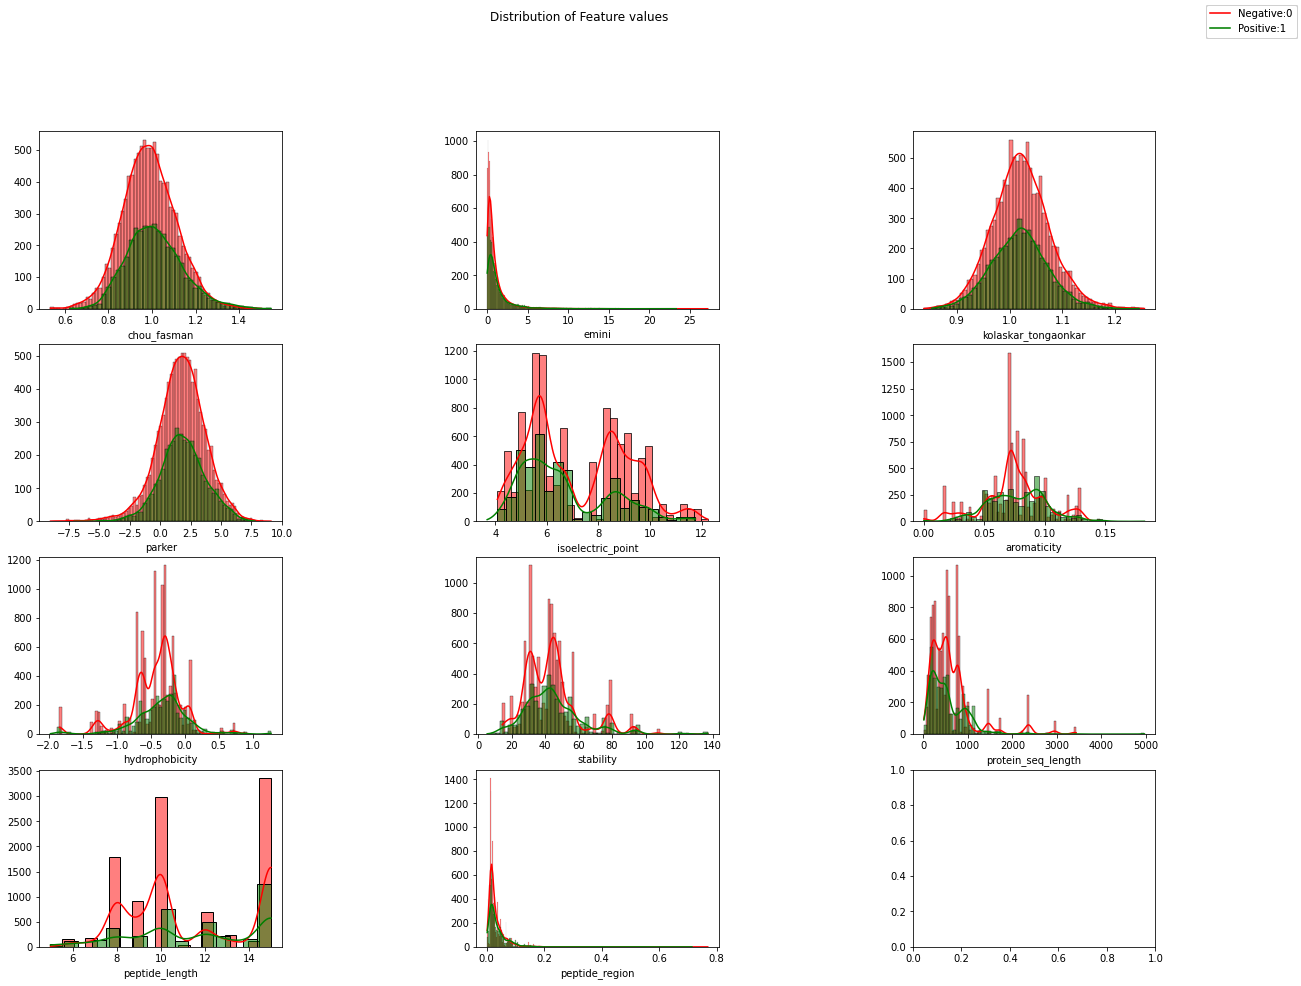

In [19]:
n = len(feature_columns)
h = math.floor(n/3)
v = math.ceil(n/h)

fig, axes = plt.subplots(v, h, figsize=(20,15))
fig.subplots_adjust(wspace=0.8)
fig.suptitle('Distribution of Feature values', va='bottom')
axes = axes.ravel()

for i, feature_name in enumerate(feature_columns):
  value = bcell[feature_name]
  graph = sns.histplot(value[labels==0], color='red', kde=True, ax=axes[i])
  graph = sns.histplot(value[labels==1], color='green', kde=True, ax=axes[i])
  graph.set(xlabel=feature_name)
  graph.set(ylabel=None)
  fig.legend(labels=['Negative:0', 'Positive:1'], loc="upper right", fancybox=True, borderpad=0.4)

* `emini` has outliers and almost a Power Law distribution
* `chou_fasman`, `kolaskar_tongaonkar`, `parker` have Gaussian distribution
* All others have non-Gaussian distribution
* For `hydrophobicity` and `aromacity`, target values of 1 are slightly more positive than target values of 0.

## Explore Feature Correlation

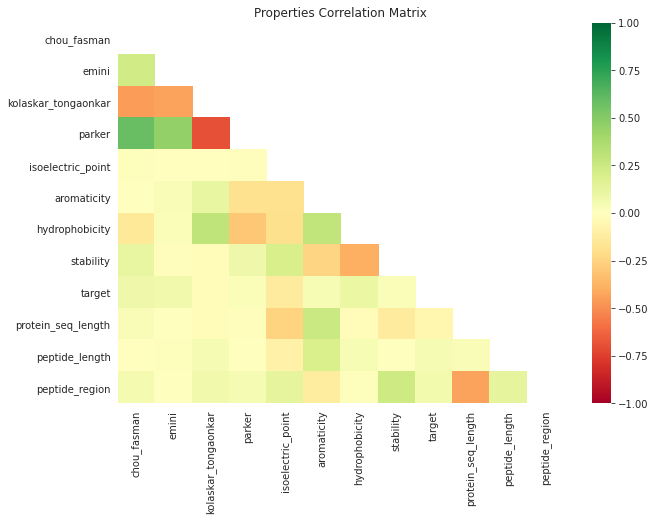

In [20]:
# Generate correlation matrix
corr_matrix = bcell[bcell.columns].corr()

# Mask auto-correlation of features
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Plot the correlation matrix
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(10, 7))
  plt.title('Properties Correlation Matrix')
  ax = sns.heatmap(corr_matrix, mask=mask, cmap="RdYlGn", vmin=-1, vmax=1)

## Check Class Imbalanace

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


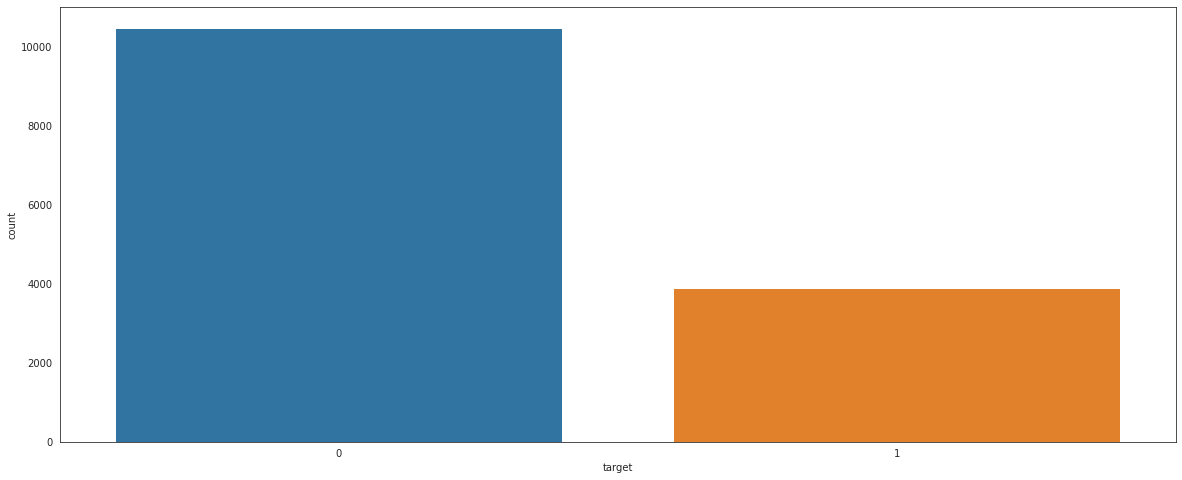

In [21]:
with sns.axes_style("white"):
  g = sns.countplot(bcell['target'])

### Generate weights to handle class imbalance


In [22]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

CLASS_WEIGHTS = get_class_weights(bcell.target.values)
print(CLASS_WEIGHTS)

{1: 2.69, 0: 1.0}


## Create Model

### Split data into training and testing set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
features = bcell.drop(columns=['target'])
label = bcell['target'].astype({'target': 'category'})

In [40]:
print(features.shape, label.shape)

(14387, 11) (14387,)


In [41]:
X_trn, X_tst, y_trn, y_tst = train_test_split(features, label, test_size=0.2, shuffle=True, random_state=20)

In [42]:
print(X_trn.shape, y_trn.shape)
print(X_tst.shape, y_tst.shape)

(11509, 11) (11509,)
(2878, 11) (2878,)


### Build the model

In [43]:
import tensorflow as tf
import tensorflow_addons as tfa

#### Hyperparameters

In [44]:
BATCH_SIZE = 512

EPOCHS = 50

STEPS_PER_EPOCH = len(X_trn.index)//BATCH_SIZE

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate=0.0003,
  decay_steps=STEPS_PER_EPOCH*10,
  decay_rate=0.0,
  staircase=True)

OPT = tfa.optimizers.LazyAdam(lr_schedule)

#LOSS = tf.keras.losses.MeanSquaredLogarithmicError()
LOSS = tf.keras.losses.Huber(delta=2)

METRICS = [tf.keras.metrics.AUC()]

DROPOUT = 0.3

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='auto', restore_best_weights=False)

#### Network

In [45]:
# Input
inputs = tf.keras.Input(shape=(X_trn.shape[-1],))

# Normalization
x = tf.keras.layers.experimental.preprocessing.Normalization()(inputs)
x = tf.keras.layers.BatchNormalization()(x)

# Feature Extraction
x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(units = 2000))(x)
x = tf.keras.layers.PReLU()(x)
x = tf.keras.layers.AlphaDropout(DROPOUT*1.5)(x)

x = tf.keras.layers.Dense(units = 1024)(x)
x = tf.keras.layers.PReLU()(x)
x = tf.keras.layers.AlphaDropout(DROPOUT)(x)

# Compression layers
x = tf.keras.layers.Dense(units = 512)(x)
x = tf.keras.layers.PReLU()(x)
x = tf.keras.layers.Dense(units = 256)(x)
x = tf.keras.layers.PReLU()(x)
x = tf.keras.layers.Dense(units = 64)(x)
x = tf.keras.layers.PReLU()(x)
x = tf.keras.layers.Dense(units = 16)(x)
x = tf.keras.layers.PReLU()(x)

# Output
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Ensemble Model
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="SARS_epitome_classifier")

In [46]:
model.compile(optimizer=OPT, loss=LOSS, metrics=METRICS)

In [47]:
model.summary()

Model: "SARS_epitome_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
normalization_2 (Normalizati (None, 11)                23        
_________________________________________________________________
batch_normalization_2 (Batch (None, 11)                44        
_________________________________________________________________
weight_normalization_2 (Weig (None, 2000)              50001     
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 2000)              2000      
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)  

## Train model

In [48]:
try:
  from livelossplot import PlotLossesKeras
except ModuleNotFoundError:
  !pip install livelossplot
  from livelossplot import PlotLossesKeras # for live training visualization

from IPython.display import clear_output
clear_output()

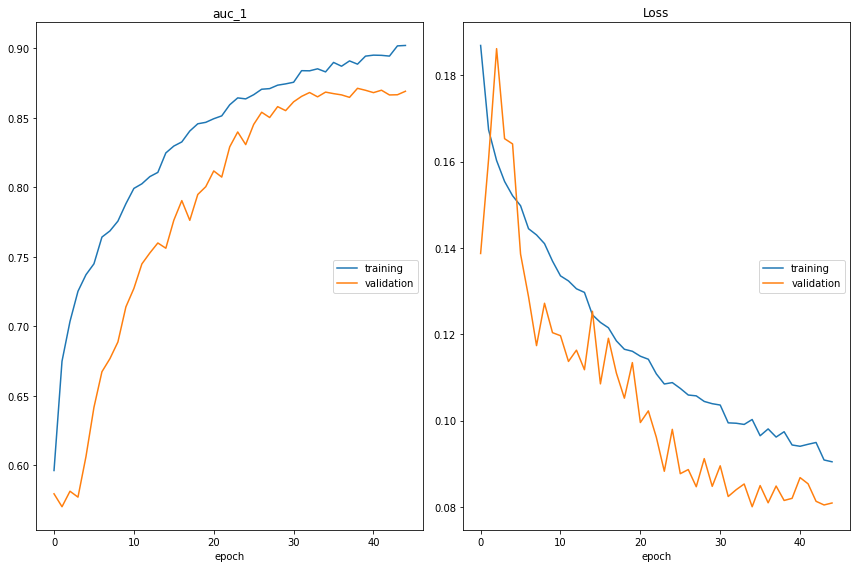

auc_1
	training         	 (min:    0.596, max:    0.902, cur:    0.902)
	validation       	 (min:    0.570, max:    0.871, cur:    0.869)
Loss
	training         	 (min:    0.090, max:    0.187, cur:    0.090)
	validation       	 (min:    0.080, max:    0.186, cur:    0.081)


In [49]:
history = model.fit(
  x=X_trn, y=y_trn,
  batch_size=BATCH_SIZE, 
  epochs=EPOCHS,
  verbose=0,
  callbacks=[PlotLossesKeras(), early_stopping],
  validation_data=(X_tst, y_tst),
  class_weight=CLASS_WEIGHTS
)

## Test model

In [56]:
test_features = sars.drop(columns=['target'])
test_label = sars['target'].astype({'target': 'category'})

In [57]:
predictions = model.evaluate(x=test_features, y=test_label, verbose=1, steps=len(test_features.index))

520/520 [==============================] - 2s 3ms/step - loss: 0.1198 - auc_1: 0.5346


## Conclusion

* The testing dataset AUC ~ 0.50 is radically different from the validation datset AUC ~ 0.87. 
  * This suggest that there could be little correlation between the two datasets. This usually means that the validation set is not representitive of the testing dataset.
* Improvement steps
  * Provide protein cluster and/or domain groups to implement Neural Structured Learning. https://www.tensorflow.org/neural_structured_learning
  * Limit training samples to only include proteins from the same or neighbouring clusters.
  * Use Tensorflow Probability to better learn nonlinear relationships. https://www.tensorflow.org/probability
  * Further optimize hyperparameters and model architecture.